In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [159]:
T2= pd.DataFrame()
xyz= np.random.normal(20, 5, (3, 1000)).T
T2['I']=np.random.normal(0.5, 0.5, 1000)
T2['Z']=np.random.normal(0.5, 0.5, 1000)
T2['W']= np.sin(T2['I']**2+ T2['Z']**2)

In [118]:
#plt.hist(T2['Z'])

In [160]:
def plot_annotated_heatmap(ax, data, gridpoints, columns, cmap='viridis'):
    #plot an annotated heatmap
    xcol, ycol, zcol= columns
    
    step1= np.ptp(data[xcol])/gridpoints
    step2= np.ptp(data[ycol])/gridpoints
    
    xgrid= np.linspace(data[xcol].min(), data[xcol].max(), gridpoints)
    ygrid= np.linspace(data[ycol].min(), data[ycol].max(), gridpoints)
    
    mask = np.zeros((len(xgrid), len(ygrid)))
    values = np.zeros((len(xgrid), len(ygrid)))
    
    
    percent1 = []
    percent2 = []
    mumber  = []
    for i in range(len(xgrid)):
        #loop over matrix
        for j in range(len(ygrid)):
            maskx= np.logical_and(data[xcol] >= xgrid[i], data[xcol] < xgrid[i]+step1)
            masky=np.logical_and(data[ycol] >= ygrid[j], data[ycol] <ygrid[j]+step2)
            zmedian= (data[zcol][np.logical_and(maskx, masky)]).mean()
            lenz= len(data[np.logical_and.reduce([maskx, masky])])
            
            if lenz == 0:
                values[j][i] = np.nan
                mask[j][i] = 1
            else:
                values[j][i] = zmedian
                plt.text(xgrid[i]+step1/2., ygrid[j]+step2/2., f'{zmedian:.2f}',
                         ha='center', va='center', fontsize=7, color='w')
                
    values2 = np.ma.array(values, mask=mask)
    cax = ax.pcolormesh(xgrid, ygrid, values2, vmin=data[zcol].min(), vmax=data[zcol].max(), cmap=cmap)
    plt.axis('tight')
    ymin, ymax = plt.ylim()

    ax.minorticks_on()

    ax.set_ylim(ymax, ymin)
    cbar = plt.colorbar(cax)
    cbar.set_label(r'')
    
    return 

<ipython-input-160-0d18b902ec8e>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xgrid, ygrid, values2, vmin=data[zcol].min(), vmax=data[zcol].max(), cmap=cmap)


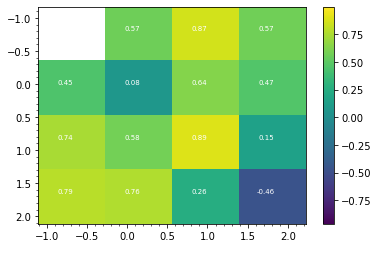

In [163]:
fig, ax=plt.subplots()
plot_annotated_heatmap(ax, T2, 5, ['I', 'Z', 'W'], cmap='viridis')

[6.   3.75]


KeyError: 'IMAG'

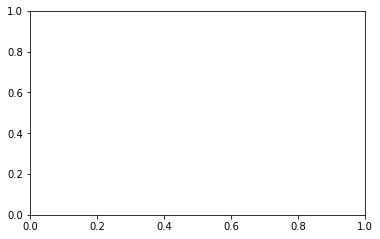

In [113]:
fig = plt.figure(1, figsize=(6, 5*3/4.))

ax = fig.add_subplot(111)

print (fig.get_size_inches())



#VALUE = []
#VALUE = np.zeros((len(COLOR), len(MAG)))
VALUE = np.zeros((len(MAG), len(COLOR)))
#VALUE3 = np.zeros((len(MAG), len(COLOR))) - 9999
Mask1 = np.zeros((len(MAG), len(COLOR)))

#Colors     = []
#Magnitudes = []
#HexVals    = []
Percent1 = []
Percent2 = []
NumberT  = []

for i in range(len(COLOR)):
	for j in range(len(MAG)):
		len1 = len(T2[( (T2['IMAG'] - T2['ZMAG'] > COLOR[i])  )])
		len2 =  len(T2[( (T2['W2MPRO'] - T2['ZMAG'] > COLOR[i])  )])

		if len1 == 0:
			#VALUE.append(np.nan)
			VALUE[j][i] = np.nan
			Mask1[j][i] = 1
			#Colors.append(COLOR[i]+step1)
			#Magnitudes.append(MAG[j]+step2)
			#HexVals.append(np.nan)
		else:
			#VALUE.append( float(len2) / float(len1) )
			VALUE[j][i] = float(len2) / float(len1)
			#VALUE3[j][i] = float(len2) / float(len1)
			#Colors.append(COLOR[i]+step1)
			#Magnitudes.append(MAG[j]+step2)
			#HexVals.append(float(len2) / float(len1))
			#if MAG[j] <= 20: 
			#	Percent1.append(float(len2) / float(len1))
			#	NumberT.append(len1)
			if MAG[j] > 20: 
				Percent2.append(float(len2) / float(len1))

			#print COLOR[i], MAG[j], len1, float(len2) / float(len1)

			#if COLOR[i] == 2.5: print i, j, COLOR[i], MAG[j], len1, len2, float(len2) / float(len1)
			if float(len2) / float(len1) < 0.5: plt.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%s'%len1, ha='center', va='center', fontsize=7, color='w')
			else: plt.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%s'%len1, ha='center', va='center', fontsize=7, color='k')
			#ax.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%s'%len1, ha='center', va='center', fontsize=7, color='w')
			#plt.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%0.3f'%(float(len2) / float(len1)), ha='center', va='center', fontsize=7, color='w')

VALUE2 = np.ma.array(VALUE, mask=Mask1)
#plt.hexbin(Colors, Magnitudes, C=HexVals)
#cax = ax.pcolormesh(COLOR, MAG, VALUE2, vmin=0, vmax=1, cmap='copper')
cax = ax.pcolormesh(COLOR, MAG, VALUE2, vmin=0, vmax=1, cmap='cubehelix')
plt.axis('tight')
#axis = plt.gca()
#axis.set_aspect('equal')
#plt.pcolormesh(COLOR, MAG, VALUE2, vmin=0, vmax=1, cmap='magma')
#plt.pcolor(COLOR, MAG, VALUE3, vmin=0, vmax=1, cmap='copper')

#fig.tight_layout()

ymin, ymax = plt.ylim()

xp = np.linspace(1, 2.9)
m10 = 7.13 + 4.88*xp
m100 = m10 + 5*np.log10(100) - 5
m200 = m10 + 5*np.log10(200) - 5

#plt.plot(xp, m10, 'r--')
#plt.plot(xp, m100, 'r:')
#plt.plot(xp, m200, 'r-.')


#ax.plot(rz1, imags2, 'r--', lw=1)
#ax.plot(rz1, imagsT, 'r--', lw=1)

#ax.text(2.7, 21.75,'20 pc', fontsize=8, weight='extra bold', color='r')
#ax.text(2.3, 21.75,'50 pc', fontsize=8, weight='extra bold', color='r')
#ax.text(2.0, 21.75,'100 pc', fontsize=8, weight='extra bold', color='r')
#ax.text(1.4, 21.75,'400 pc', fontsize=8, weight='extra bold', color='r')

#plt.plot([1,3], [20,20], 'r:', lw=1)
#plt.text(2.6, 19.9,'Gaia limit', fontsize=6, weight='extra bold', color='r')
######

ax.minorticks_on()

ax.set_ylim(ymax, ymin)
cbar = plt.colorbar(cax)
cbar.set_label('Fraction of LaTE-MoVeRS Sources' + '\n' + 'with Parallaxes in $Gaia$ DR2')
#cbar.set_clim(0, 1.2)